In [ ]:
import argparse
import logging
import os
import pandas as pd

import numpy as np
import torch
from PIL import Image
from torchvision import transforms
from tqdm import tqdm
import torch.nn.functional as F

In [ ]:
!git clone https://github.com/andreytomashev99/test.git

In [ ]:
%cd test

In [ ]:
from unet import UNet
from utils import plot_img_and_mask
from utils import resize_and_crop, normalize, hwc_to_chw, dense_crf, data_vis, rle_encode

In [ ]:
test = pd.read_csv('data/submission.csv')
test['Image'] = test['Image_Label'].map(lambda x: x.split('.')[0])
test['Label'] = test['Image_Label'].map(lambda x: x.split('_')[1])

In [ ]:
test.head()

,Image_Label,EncodedPixels,Image,Label
0,002f507.jpg_Fish,NaN,002f507,Fish
1,002f507.jpg_Flower,NaN,002f507,Flower
2,002f507.jpg_Gravel,354 338 703 346 1052 347 1402 347 1752 348 210...,002f507,Gravel
3,002f507.jpg_Sugar,NaN,002f507,Sugar
4,0035ae9.jpg_Fish,NaN,0035ae9,Fish


In [ ]:
def predict_img(net,
                full_img,
                device,
                scale_factor=1,
                out_threshold=0.5,
                use_dense_crf=False):
    net.eval()
    
    img_height = full_img.size[1]
    img_width = full_img.size[0]

    img = resize_and_crop(full_img, scale=scale_factor)
    img = normalize(img)
    img = hwc_to_chw(img)

    X = torch.from_numpy(img).unsqueeze(0)

    X = X.to(device=device)

    with torch.no_grad():
        output = net(X)
        probs = torch.sigmoid(output)
        probs = probs.squeeze(0)

        tf = transforms.Compose(
            [
                transforms.ToPILImage(),
                transforms.Resize(350),
                transforms.ToTensor()
            ]
        )

        probs = tf(probs.cpu())

        full_mask = probs.squeeze().cpu().numpy()
        return full_mask > out_threshold


In [ ]:
import matplotlib.pyplot as plt
def plot_img_and_mask(img, mask):
    classes = mask.shape[2] if len(mask.shape) > 2 else 1
    fig, ax = plt.subplots(1, classes + 1)
    ax[0].set_title('Input image')
    ax[0].imshow(img)
    if classes > 1:
        for i in range(classes):
            ax[i+1].set_title(f'Output mask (class {i+1})')
            ax[i+1].imshow(mask[:, :, i])
    else:
        ax[1].set_title(f'Output mask')
        ax[1].imshow(mask)
        


In [ ]:
net_flower = UNet(n_channels=3, n_classes=1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')
net_flower.to(device=device)
net_flower.load_state_dict(torch.load('models/Flower.pth', map_location=device))

logging.info("Model loaded !")

with tqdm(total=len(test)/4, unit='img') as pbar:
    for i, b in enumerate(test['Image']):
        if(test['Label'][i] == 'Flower'):

            img = Image.open('data/test/' + test['Image'][i] + '.jpg')
            mask = predict_img(net=net_flower,
                                full_img=img,
                                scale_factor=0.5,
                                out_threshold = 0.98,
                                use_dense_crf=False,
                                device=device)
            rle_mask = ' '.join(map(str, list(rle_encode(mask))))
            test['EncodedPixels'][i] = rle_mask 
            pbar.update(1)

In [ ]:
plt.figure()
plt.imshow(mask)
plt.figure()
plt.imshow(img)

In [ ]:
net_fish = UNet(n_channels=3, n_classes=1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')
net_fish.to(device=device)
net_fish.load_state_dict(torch.load('models/Fish.pth', map_location=device))

logging.info("Model loaded !")

with tqdm(total=len(test)/4, unit='img') as pbar:
    for i, b in enumerate(test['Image']):
        if(test['Label'][i] == 'Fish'):

            img = Image.open('data/test/' + test['Image'][i] + '.jpg')
            mask = predict_img(net=net_fish,
                                full_img=img,
                                scale_factor = 0.5,
                                out_threshold = 0.96,
                                use_dense_crf=False,
                                device=device)
            rle_mask = ' '.join(map(str, list(rle_encode(mask))))
            test['EncodedPixels'][i] = rle_mask 
            pbar.update(1)

100%|██████████| 3698/3698.0 [02:33<00:00, 24.04img/s]


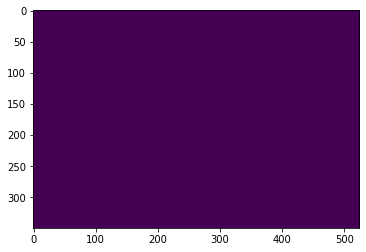

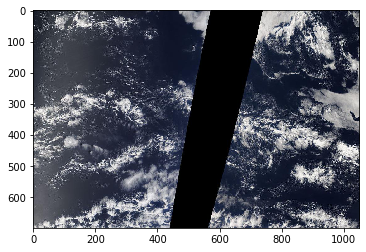

In [ ]:
plt.figure()
plt.imshow(mask)
plt.figure()
plt.imshow(img)

In [ ]:
net_gravel = UNet(n_channels=3, n_classes=1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')
net_gravel.to(device=device)
net_gravel.load_state_dict(torch.load('models/Gravel.pth', map_location=device))

logging.info("Model loaded !")

with tqdm(total=len(test)/4, unit='img') as pbar:
    for i, b in enumerate(test['Image']):
        if(test['Label'][i] == 'Gravel'):

            img = Image.open('data/test/' + test['Image'][i] + '.jpg')
            mask = predict_img(net=net_gravel,
                                full_img=img,
                                scale_factor=0.5,
                                out_threshold = 0.8,
                                use_dense_crf=False,
                                device=device)
            rle_mask = ' '.join(map(str, list(rle_encode(mask))))
            test['EncodedPixels'][i] = rle_mask 
            pbar.update(1)

In [ ]:
plt.figure()
plt.imshow(mask)
plt.figure()
plt.imshow(img)

In [ ]:
net_sugar = UNet(n_channels=3, n_classes=1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')
net_sugar.to(device=device)
net_sugar.load_state_dict(torch.load('models/Sugar.pth', map_location=device))

logging.info("Model loaded !")

with tqdm(total=len(test)/4, unit='img') as pbar:
    for i, b in enumerate(test['Image']):
        if(test['Label'][i] == 'Sugar'):

            img = Image.open('data/test/' + test['Image'][i] + '.jpg')
            mask = predict_img(net=net_sugar,
                                full_img=img,
                                scale_factor=0.5,
                                out_threshold = 0.8,
                                use_dense_crf=False,
                                device=device)
            rle_mask = ' '.join(map(str, list(rle_encode(mask))))
            test['EncodedPixels'][i] = rle_mask 
            pbar.update(1)

In [ ]:
plt.figure()
plt.imshow(mask)
plt.figure()
plt.imshow(img)

In [ ]:
submit = test.drop(['Image', 'Label'], axis = 1)

In [ ]:
submit


,Image_Label,EncodedPixels
0,002f507.jpg_Fish,
1,002f507.jpg_Flower,NaN
2,002f507.jpg_Gravel,354 338 703 346 1052 347 1402 347 1752 348 210...
3,002f507.jpg_Sugar,NaN
4,0035ae9.jpg_Fish,
...,...,...
14787,ffe0620.jpg_Sugar,NaN
14788,fff3c5c.jpg_Fish,
14789,fff3c5c.jpg_Flower,128626 7 128974 10 129322 14 129671 16 130020 ...
14790,fff3c5c.jpg_Gravel,NaN


In [ ]:
submit.to_csv('submission_complete.csv', index = False)